In [111]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [112]:
filepath = "Resources/MexicoCityAQI.csv"
MexAQIDF = pd.read_csv(filepath , delimiter=", ")

In [113]:
MexAQIDF["date"] = MexAQIDF["date"].astype(str)
MexAQIDF

,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,39.0,36.0,58.0,18.0,2,7.0
1,2020/7/3,65.0,28.0,44.0,18.0,2,6.0
2,2020/7/4,47.0,30.0,59.0,18.0,4,7.0
3,2020/7/5,62.0,29.0,61.0,18.0,3,7.0
4,2020/7/6,73.0,21.0,53.0,24.0,1,10.0
...,...,...,...,...,...,...,...
1286,2017/3/27,NaN,NaN,59.0,37.0,8,11.0
1287,2017/3/28,NaN,NaN,49.0,35.0,6,11.0
1288,2016/12/14,NaN,NaN,48.0,49.0,11,11.0
1289,2016/12/15,NaN,NaN,26.0,33.0,12,10.0


In [114]:
#split DF in year/month to sort
MexAQIDF[["year","month","day"]] = MexAQIDF["date"].str.split("/", n=2, expand=True)
MexAQIDF

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020/7/2,39.0,36.0,58.0,18.0,2,7.0,2020,7,2
1,2020/7/3,65.0,28.0,44.0,18.0,2,6.0,2020,7,3
2,2020/7/4,47.0,30.0,59.0,18.0,4,7.0,2020,7,4
3,2020/7/5,62.0,29.0,61.0,18.0,3,7.0,2020,7,5
4,2020/7/6,73.0,21.0,53.0,24.0,1,10.0,2020,7,6
...,...,...,...,...,...,...,...,...,...,...
1286,2017/3/27,NaN,NaN,59.0,37.0,8,11.0,2017,3,27
1287,2017/3/28,NaN,NaN,49.0,35.0,6,11.0,2017,3,28
1288,2016/12/14,NaN,NaN,48.0,49.0,11,11.0,2016,12,14
1289,2016/12/15,NaN,NaN,26.0,33.0,12,10.0,2016,12,15


In [115]:
#get rid of dates we're not looking for
MexAQIDF["month"] = MexAQIDF["month"].astype(int) #Switch to perform function
MexAQIDF["year"] = MexAQIDF["year"].astype(int) #Switch to perform yearly dataframe calc
MexAQIDF = MexAQIDF[MexAQIDF["month"] < 8] #Here the calc is
MexAQIDF = MexAQIDF[MexAQIDF["year"] > 2016] #Here the calc is
MexAQIDF["month"] = MexAQIDF["month"].astype(str) #Switch back to rename later
MexAQIDF

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020/7/2,39.0,36.0,58.0,18.0,2,7.0,2020,7,2
1,2020/7/3,65.0,28.0,44.0,18.0,2,6.0,2020,7,3
2,2020/7/4,47.0,30.0,59.0,18.0,4,7.0,2020,7,4
3,2020/7/5,62.0,29.0,61.0,18.0,3,7.0,2020,7,5
4,2020/7/6,73.0,21.0,53.0,24.0,1,10.0,2020,7,6
...,...,...,...,...,...,...,...,...,...,...
1283,2017/3/24,NaN,NaN,52.0,40.0,6,13.0,2017,3,24
1284,2017/3/25,NaN,NaN,44.0,33.0,8,9.0,2017,3,25
1285,2017/3/26,NaN,NaN,54.0,29.0,4,10.0,2017,3,26
1286,2017/3/27,NaN,NaN,59.0,37.0,8,11.0,2017,3,27


In [116]:
#Check to see if there's not too many missing values for 2017 and pm25, which will be our main variable to determine AQI
Mex2017AQIDF = MexAQIDF[MexAQIDF["year"] == 2017]
Mex2017AQIDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 904 to 1287
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    205 non-null    object 
 1   pm25    183 non-null    float64
 2   pm10    182 non-null    float64
 3   o3      203 non-null    float64
 4   no2     203 non-null    float64
 5   so2     205 non-null    object 
 6   co      199 non-null    float64
 7   year    205 non-null    int32  
 8   month   205 non-null    object 
 9   day     205 non-null    object 
dtypes: float64(5), int32(1), object(4)
memory usage: 16.8+ KB


In [117]:
#make sure there's sufficient enough data for each month
Mex2017AQIDF["month"].value_counts()

5    31
7    31
3    30
6    30
4    29
2    28
1    26
Name: month, dtype: int64

In [118]:
#drop trash columns and null values.....and reset index cause OCD even though it's not necessary
Mex2017AQIDF.dropna(subset=["pm25"], inplace=True)
Mex2017AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
Mex2017AQIDF.reset_index(drop=True, inplace=True)
Mex2017AQIDF 

,pm25,month
0,65.0,7
1,62.0,7
2,71.0,7
3,75.0,7
4,72.0,7
...,...,...
178,77.0,3
179,70.0,3
180,91.0,4
181,78.0,1


In [119]:
#Create a list, do a function for each pm25 value to calculate AQI and store into the list to add to the dataframe
AQI2017 = []

for value in Mex2017AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2017.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2017.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2017.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2017.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2017.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2017.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2017.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2017.append("invalid")
#Add list to data frame, then drop rows with invalid values
Mex2017AQIDF["AQI"] = AQI2017
Mex2017AQIDF = Mex2017AQIDF[Mex2017AQIDF["AQI"] != "invalid" ]
#round it up
Mex2017AQIDF["AQI"] = [round(i) for i in Mex2017AQIDF["AQI"]]
Mex2017AQIDF

,pm25,month,AQI
0,65.0,7,156
1,62.0,7,154
2,71.0,7,159
3,75.0,7,161
4,72.0,7,160
...,...,...,...
178,77.0,3,162
179,70.0,3,158
180,91.0,4,169
181,78.0,1,163


In [120]:
#Find the mean AQI and SEM for each month for the year 2017...rename index to be legible...
Mex2017 = Mex2017AQIDF.groupby(["month"]).agg({"AQI":["mean","sem"]})
Mex2017.columns = Mex2017.columns.droplevel()
Mex2017.rename(columns={"mean":"2017 Mean AQI","sem":"2017 SEM"}, index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
Mex2017 = Mex2017.astype(int)
Mex2017

,2017 Mean AQI,2017 SEM
month,,
Jan,176,1
Feb,167,2
March,170,2
April,167,1
May,172,2
June,152,3
July,150,5


In [121]:
#and repeat for the rest of the years
Mex2018AQIDF = MexAQIDF[MexAQIDF["year"] == 2018]
Mex2018AQIDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 612 to 1268
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    202 non-null    object 
 1   pm25    172 non-null    float64
 2   pm10    173 non-null    float64
 3   o3      199 non-null    float64
 4   no2     198 non-null    float64
 5   so2     198 non-null    object 
 6   co      194 non-null    float64
 7   year    202 non-null    int32  
 8   month   202 non-null    object 
 9   day     202 non-null    object 
dtypes: float64(5), int32(1), object(4)
memory usage: 16.6+ KB


In [122]:
Mex2018AQIDF["month"].value_counts()

5    31
7    30
6    30
4    30
3    29
2    28
1    24
Name: month, dtype: int64

In [123]:
Mex2018AQIDF.dropna(subset=["pm25"], inplace=True)
Mex2018AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
Mex2018AQIDF.reset_index(drop=True, inplace=True)
Mex2018AQIDF

,pm25,month
0,99.0,7
1,75.0,7
2,99.0,7
3,59.0,7
4,51.0,7
...,...,...
167,89.0,3
168,82.0,3
169,80.0,3
170,75.0,3


In [124]:
Mex2019AQIDF = MexAQIDF[MexAQIDF["year"] == 2019]
Mex2019AQIDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 273 to 1197
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    211 non-null    object 
 1   pm25    206 non-null    float64
 2   pm10    207 non-null    float64
 3   o3      208 non-null    float64
 4   no2     200 non-null    float64
 5   so2     211 non-null    object 
 6   co      181 non-null    float64
 7   year    211 non-null    int32  
 8   month   211 non-null    object 
 9   day     211 non-null    object 
dtypes: float64(5), int32(1), object(4)
memory usage: 17.3+ KB


In [125]:
Mex2019AQIDF.dropna(subset=["pm25"], inplace=True)
Mex2019AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
Mex2019AQIDF.reset_index(drop=True, inplace=True)
Mex2019AQIDF

,pm25,month
0,46.0,7
1,57.0,7
2,50.0,7
3,82.0,7
4,84.0,7
...,...,...
201,61.0,3
202,65.0,3
203,85.0,3
204,97.0,3


In [126]:
Mex2020AQIDF = MexAQIDF[MexAQIDF["year"] == 2020]
Mex2020AQIDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 1229
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    202 non-null    object 
 1   pm25    187 non-null    float64
 2   pm10    187 non-null    float64
 3   o3      198 non-null    float64
 4   no2     185 non-null    float64
 5   so2     201 non-null    object 
 6   co      165 non-null    float64
 7   year    202 non-null    int32  
 8   month   202 non-null    object 
 9   day     202 non-null    object 
dtypes: float64(5), int32(1), object(4)
memory usage: 16.6+ KB


In [127]:
Mex2020AQIDF["month"].value_counts()

5    31
3    31
1    30
6    30
4    30
2    26
7    24
Name: month, dtype: int64

In [128]:
Mex2020AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","day","year"], inplace=True)
Mex2020AQIDF.dropna(subset=["pm25"], inplace=True)
Mex2020AQIDF.reset_index(drop=True, inplace=True)
Mex2020AQIDF

,pm25,month
0,39.0,7
1,65.0,7
2,47.0,7
3,62.0,7
4,73.0,7
...,...,...
182,52.0,1
183,46.0,1
184,48.0,1
185,42.0,1


In [129]:
AQI2019 = []
for value in Mex2019AQIDF["pm25"]:
    if value >= 0 and value <= 12:
        AQI2019.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2019.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2019.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2019.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2019.append("invalid")
Mex2019AQIDF["AQI"] = AQI2019
Mex2019AQIDF = Mex2019AQIDF[Mex2019AQIDF["AQI"] != "invalid" ]

Mex2019AQIDF["AQI"] = [round(i) for i in Mex2019AQIDF["AQI"]]


AQI2018 = []
for value in Mex2018AQIDF["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2018.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2018.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2018.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2018.append("invalid")
Mex2018AQIDF["AQI"] = AQI2018
Mex2018AQIDF = Mex2018AQIDF[Mex2018AQIDF["AQI"] != "invalid" ]

Mex2018AQIDF["AQI"] = [round(i) for i in Mex2018AQIDF["AQI"]]
Mex2018AQIDF

,pm25,month,AQI
0,99.0,7,173
1,75.0,7,161
2,99.0,7,173
3,59.0,7,153
4,51.0,7,139
...,...,...,...
167,89.0,3,168
168,82.0,3,165
169,80.0,3,164
170,75.0,3,161


In [130]:
AQI2020 = []
for value in Mex2020AQIDF["pm25"]:
    if value >= 0 and value <= 12:
        AQI2020.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2020.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2020.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2020.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2020.append("invalid")
Mex2020AQIDF["AQI"] = AQI2020
Mex2020AQIDF = Mex2020AQIDF[Mex2020AQIDF["AQI"] != "invalid" ]

Mex2020AQIDF["AQI"] = [round(i) for i in Mex2020AQIDF["AQI"]]
Mex2020AQIDF

,pm25,month,AQI
0,39.0,7,110
1,65.0,7,156
2,47.0,7,129
3,62.0,7,154
4,73.0,7,160
...,...,...,...
182,52.0,1,142
183,46.0,1,127
184,48.0,1,132
185,42.0,1,117


In [131]:
#Get mean and SEM by month, for each year data frame. Rename and reset index and columns
Mex2020 = Mex2020AQIDF.groupby(["month"]).agg({"AQI":["mean","sem"]})
Mex2020.rename(columns={"mean": "2020 Mean AQI", "sem": "2020 SEM"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
Mex2020.columns = Mex2020.columns.droplevel()
Mex2020 = Mex2020.astype(int)
Mex2020

,2020 Mean AQI,2020 SEM
month,,
Jan,149,4
Feb,144,5
March,161,2
April,162,1
May,162,2
June,149,2
July,141,3


In [132]:
#Get mean and SEM by month, for each year data frame. Rename and reset index and columns
Mex2019 = Mex2019AQIDF.groupby(["month"]).agg({"AQI":["mean","sem"]})
Mex2019.rename(columns={"mean": "2019 Mean AQI", "sem": "2019 SEM"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
Mex2019.columns = Mex2019.columns.droplevel()
Mex2019 = Mex2019.astype(int)
Mex2019

,2019 Mean AQI,2019 SEM
month,,
Jan,162,2
Feb,155,2
March,160,1
April,168,1
May,172,3
June,140,4
July,153,2


In [133]:
#Get mean and SEM by month, for each year data frame. Rename and reset index and columns
Mex2018 = Mex2018AQIDF.groupby(["month"]).agg({"AQI":["mean","sem"]})
Mex2018.rename(columns={"mean": "2018 Mean AQI", "sem": "2018 SEM"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
Mex2018.columns = Mex2018.columns.droplevel()
Mex2018 = Mex2018.astype(int)
Mex2018

,2018 Mean AQI,2018 SEM
month,,
Jan,166,4
Feb,161,4
March,165,2
April,163,1
May,157,3
June,141,5
July,153,4


In [134]:
#Add year dataframes to one full and also make csv
MexDF = pd.concat([Mex2017, Mex2018, Mex2019, Mex2020], axis=1)
MexDF.to_csv("FinalCityCSV/MexicoCityFinalDF.csv")
MexDF

,2017 Mean AQI,2017 SEM,2018 Mean AQI,2018 SEM,2019 Mean AQI,2019 SEM,2020 Mean AQI,2020 SEM
month,,,,,,,,
Jan,176,1,166,4,162,2,149,4
Feb,167,2,161,4,155,2,144,5
March,170,2,165,2,160,1,161,2
April,167,1,163,1,168,1,162,1
May,172,2,157,3,172,3,162,2
June,152,3,141,5,140,4,149,2
July,150,5,153,4,153,2,141,3


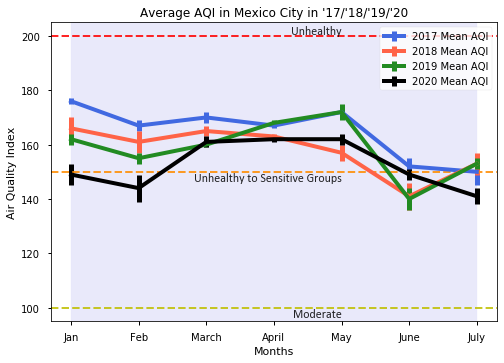

In [135]:
#plot some stuff bruh
plt.style.use('seaborn-notebook')

plt.errorbar(MexDF.index, MexDF["2017 Mean AQI"], yerr=MexDF["2017 SEM"], color="royalblue", linewidth=4, elinewidth=5, label="2017 Mean AQI")
plt.errorbar(MexDF.index, MexDF["2018 Mean AQI"], yerr=MexDF["2018 SEM"], color="tomato", linewidth=4, elinewidth=5, label="2018 Mean AQI")
plt.errorbar(MexDF.index, MexDF["2019 Mean AQI"], yerr=MexDF["2019 SEM"], color="forestgreen", linewidth=4, elinewidth=5, label="2019 Mean AQI")
plt.errorbar(MexDF.index, MexDF["2020 Mean AQI"], yerr=MexDF["2020 SEM"], color="black", linewidth=4, elinewidth=5, label="2020 Mean AQI")

#plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
#plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri', alpha=.5)
plt.axhline(y=200,color='r', alpha=.85, linestyle='--', lw=2)
plt.text(4,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri',alpha=.85)
plt.axhline(y=150,color='darkorange', alpha=.85, linestyle='--', lw=2)
plt.text(4,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri',alpha=.85)
plt.axhline(y=100,color='y', alpha=.85, linestyle='--', lw=2)
plt.text(4,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri',alpha=.85)
#plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
#plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.title("Average AQI in Mexico City in '17/'18/'19/'20")
plt.ylabel("Air Quality Index")
plt.xlabel("Months")

#Need data for arguments
x = np.arange(7)
y1 = 205
y2 = 95
#y3 = 100
plt.fill_between(x, y1, y2, where = y1 > y2,  color="lavender", alpha = 0.85)

#limit the y axis
plt.ylim(95,205)

#Make objects for legend to pick up and describe background
#backleg = [Patch(facecolor="red", label="Unhealthy"), Patch(facecolor="orange", label="Warning4SensitiveGrps")]
#plt.fill_between(x, y2, y3, where = y2 > y3,  color="orange", alpha = 0.35, label="Warning4SensitiveGrps")
#plt.plot(MexDF["2017 Mean AQI"], color="royalblue", marker="o", linewidth=3.5, markersize=8, label="2017 MeanAQI")
#plt.plot(MexDF["2018 Mean AQI"], color="tomato", marker="o", linewidth=3.5, markersize=8, label="2018 MeanAQI")
#plt.plot(MexDF["2019 Mean AQI"], color="forestgreen", marker="o", linewidth=3.5, markersize=8, label="2019 MeanAQI")
#plt.plot(MexDF["2020 Mean AQI"], color="black", marker="o", linewidth=3.5, markersize=8, label="2020 MeanAQI")
#bins = [0,50,100,150,200,300,500]
#quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]
plt.legend(loc="best")

plt.savefig("SavedFigures/MexCityAQI.png")

In [1]:
pwd

"c:\\Users\\goroq\\Documents\\Data\\project-one\\Aaron's Work"